In [501]:
import pulp

In [502]:
#Declaring constants
NUM_COMPONENTS = 11

In [503]:
# dict for the parameters [height, width] for each component
param_dict = {
    # For square-shaped components, "Component name": [component_length, component_width] 
    # For circular-shaped, "Component name": component_radius
    'chipset':[5,5], 
    'cpu':[3,3], 
    'coolfan': 5, 
    'cmos':2, 
    'bios':[3,3], 
    'powercon':[1,2], 
    'usb':[1,2], 
    'ram':[12,2]
}

# define the LP
problem = pulp.LpProblem('motherboard', pulp.LpMinimize)

# define variables
p1 = pulp.LpVariable('p1', lowBound=1, cat='Continuous')
p2 = pulp.LpVariable('p2', lowBound=0.8, cat='Continuous')
x = pulp.LpVariable.dicts('x',range(1, NUM_COMPONENTS+1), lowBound=0, cat='Continuous')
y = pulp.LpVariable.dicts('y',range(1, NUM_COMPONENTS+1), lowBound=0, cat='Continuous')
width = pulp.LpVariable('width', lowBound=0, cat='Continuous')
height = pulp.LpVariable('height', lowBound=0, cat='Continuous')



Adding the objective function to the minimization problem

In [504]:
# objective function
problem += 2*width + 2*height

Adding horizontal constraints

In [505]:
# Adding horizontal constraints
problem += x[1] - p1 >= 0
problem += x[1] + p1 + param_dict['chipset'][1] + param_dict['coolfan'] <= x[3]
problem += x[4] - p1 - param_dict['cmos'] >= 0 
# problem += x[3] + param_dict['coolfan'] == x[6]
problem += x[5] + param_dict['bios'] + param_dict['coolfan'] <= x[3]
problem += x[4] + p1 + param_dict['cmos'] <= x[5]
problem += x[5] + p1 + param_dict['bios'][1] <= x[6]
problem += x[6] + p1 + param_dict['powercon'][1] <= x[7]
problem += x[7] + p1 + param_dict['usb'][1] <= x[8]
problem += x[3] + p1 + param_dict['coolfan'] <= x[8]
problem += x[8] + p2 + param_dict['ram'][1] <= x[9]
problem += x[9] + p2 + param_dict['ram'][1] <= x[10]
problem += x[10] + p2 + param_dict['ram'][1] <= x[11]
problem += x[11] + p2 + param_dict['ram'][1] <= width


Adding vertical constraints

In [506]:

# Adding vertical constraints
problem += y[4] - p1 - param_dict['cmos'] >= 0
problem += y[4] + p1 + param_dict['cmos'] <= y[1]
problem += y[1] + p1 + param_dict['chipset'][0] <= height
problem += y[5] - p1 >= 0
problem += y[5] + p1 + param_dict['bios'][0] <= y[1]
problem += y[6] - p1 >= 0
problem += y[6] + p1 + param_dict['powercon'][0] + param_dict['coolfan'] <= y[3]
problem += y[3] + p1 + param_dict['coolfan'] <= height
problem += y[7] - p1 >= 0
problem += y[7] + p1 + param_dict['usb'][0] + param_dict['coolfan'] <= y[3]
problem += y[8] - p1 >= 0
problem += y[8] + param_dict['ram'][0] + p2 <= height
problem += y[9] - p1 >= 0
problem += y[9] + param_dict['ram'][0] + p2 <= height
problem += y[10] - p1 >= 0
problem += y[10] + param_dict['ram'][0] + p2 <= height
problem += y[11] - p1 >= 0
problem += y[11] + param_dict['ram'][0] + p2 <= height


Adding alignment constraints for components

In [507]:

#alignment constraints
problem += x[2] + 0.5*param_dict['cpu'][1] == x[3]
problem += (x[6] + param_dict['powercon'] + x[7])/2 == x[3]
problem += (x[4] + param_dict['cmos'] + x[5])/2 == x[1] + 0.5*param_dict['chipset'][1]
problem += y[2] + 0.5*param_dict['cpu'][0] == y[3]


In [508]:
# problem += param_dict['ram'][0] / 0.8 <= height

Solving the problem

In [509]:
# solving the problem
problem.solve(pulp.PULP_CBC_CMD(msg=0))

# create dictionary with the solutions
solution = {}
for var in problem.variables():
    solution[var.name] = var.varValue

In [510]:

print(solution)
# print("Optimised Perimeter of motherboard: ", 2*(solution["width"] + solution["height"]), "cm")
# print("Width of motherboard:", solution['width'],  "Height of motherboard:", solution["height"])
# print(f"Coordinates of Chipset (component 1): ",(solution["x_1"] , solution["y_1"]))
# print(f"Coordinates of CPU (component 2): ",(solution["x_2"] , solution["y_2"]))
# print(f"Coordinates of Cooling Fan (component 3): ",(solution["x_3"] , solution["y_3"]))
# print(f"Coordinates of CMOS (component 4): ",(solution["x_4"] , solution["y_4"]))
# print(f"Coordinates of BIOS (component 5): ",(solution["x_5"] , solution["y_5"]))
# print(f"Coordinates of Power Converter (component 6): ",(solution["x_6"] , solution["y_6"]))
# print(f"Coordinates of USB Converter (component 7): ",(solution["x_7"] , solution["y_7"]))
# print(f"Coordinates of RAM Memory Stick 1 (component 8): ",(solution["x_8"] , solution["y_8"]))
# print(f"Coordinates of RAM Memory Stick 2 (component 9): ",(solution["x_9"] , solution["y_9"]))
# print(f"Coordinates of RAM Memory Stick 3 (component 10): ",(solution["x_10"] , solution["y_10"]))
# print(f"Coordinates of RAM Memory Stick 4 (component 11): ",(solution["x_11"] , solution["y_11"]))

{'height': 14.0, 'p1': 1.0, 'p2': 0.8, 'width': 34.2, 'x_1': 3.0, 'x_10': 28.6, 'x_11': 31.4, 'x_2': 15.5, 'x_3': 17.0, 'x_4': 3.0, 'x_5': 6.0, 'x_6': 14.0, 'x_7': 17.0, 'x_8': 23.0, 'x_9': 25.8, 'y_1': 8.0, 'y_10': 1.2, 'y_11': 1.2, 'y_2': 6.5, 'y_3': 8.0, 'y_4': 5.0, 'y_5': 4.0, 'y_6': 1.0, 'y_7': 1.0, 'y_8': 1.2, 'y_9': 1.2}


Visualisation of the motherboard with matplotlib

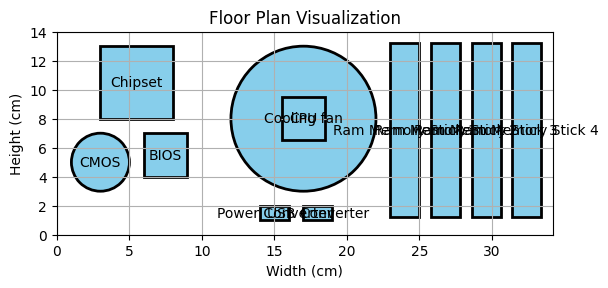

In [511]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

# Example component sizes and positions (x, y, width, height)
rectangular_components = [
    {'name': 'Chipset', 'x': solution["x_1"], 'y': solution["y_1"], 'width': param_dict["chipset"][1], 'height': param_dict["chipset"][0]},
    {'name': 'CPU', 'x': solution["x_2"], 'y': solution["y_2"], 'width': param_dict["cpu"][1], 'height': param_dict["cpu"][0]},
    {'name': 'BIOS', 'x': solution["x_5"], 'y': solution["y_5"], 'width': param_dict["bios"][1], 'height': param_dict["bios"][0]},
    {'name': 'Power Converter', 'x': solution["x_6"], 'y': solution["y_6"], 'width': param_dict["powercon"][1], 'height': param_dict["powercon"][0]},
    {'name': 'USB Converter', 'x': solution["x_7"], 'y': solution["y_7"], 'width': param_dict["usb"][1], 'height': param_dict["usb"][0]},
    {'name': 'Ram Memory Stick 1', 'x': solution["x_8"], 'y': solution["y_8"], 'width': param_dict["ram"][1], 'height': param_dict["ram"][0]},
    {'name': 'Ram Memory Stick 2', 'x': solution["x_9"], 'y': solution["y_9"], 'width': param_dict["ram"][1], 'height': param_dict["ram"][0]},
    {'name': 'Ram Memory Stick 3', 'x': solution["x_10"], 'y': solution["y_10"], 'width': param_dict["ram"][1], 'height': param_dict["ram"][0]},
    {'name': 'Ram Memory Stick 4', 'x': solution["x_11"], 'y': solution["y_11"], 'width': param_dict["ram"][1], 'height': param_dict["ram"][0]},

]

circular_components = [
    {'name': 'Cooling fan', 'x': solution["x_3"], 'y': solution["y_3"], 'radius': param_dict["coolfan"]},
    {'name': 'CMOS', 'x': solution["x_4"], 'y': solution["y_4"], 'radius': param_dict["cmos"]},

]

# Create a figure and axis
fig, ax = plt.subplots()

for component in circular_components:
    circle = Circle((component["x"], component["y"]), radius=component['radius'], edgecolor='black', facecolor='skyblue', lw=2)
    ax.add_patch(circle)
    ax.text(component['x'],  component['y'], component['name'], fontsize=10, ha='center', va='center')

# Draw the rectangles (components)
for component in rectangular_components:
    rect = Rectangle((component['x'], component['y']), component['width'], component['height'],
                     edgecolor='black', facecolor='skyblue', lw=2)
    ax.add_patch(rect)
    # Add text to label the component
    cx = component['x'] + component['width'] / 2
    cy = component['y'] + component['height'] / 2
    ax.text(cx, cy, component['name'], fontsize=10, ha='center', va='center')



# Set the limits of the plot based on the components' sizes
ax.set_xlim(0, solution["width"])
ax.set_ylim(0, solution["height"])

# Set labels and title
ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')
ax.set_title('Floor Plan Visualization')

# Display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()
